In [8]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [9]:

df = pd.read_csv('data/ai_job_market_insights.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Job_Title              500 non-null    object 
 1   Industry               500 non-null    object 
 2   Company_Size           500 non-null    object 
 3   Location               500 non-null    object 
 4   AI_Adoption_Level      500 non-null    object 
 5   Automation_Risk        500 non-null    object 
 6   Required_Skills        500 non-null    object 
 7   Salary_USD             500 non-null    float64
 8   Remote_Friendly        500 non-null    object 
 9   Job_Growth_Projection  500 non-null    object 
dtypes: float64(1), object(9)
memory usage: 39.2+ KB


In [11]:
print( df.head())

               Job_Title       Industry Company_Size   Location  \
0  Cybersecurity Analyst  Entertainment        Small      Dubai   
1   Marketing Specialist     Technology        Large  Singapore   
2          AI Researcher     Technology        Large  Singapore   
3          Sales Manager         Retail        Small     Berlin   
4  Cybersecurity Analyst  Entertainment        Small      Tokyo   

  AI_Adoption_Level Automation_Risk     Required_Skills     Salary_USD  \
0            Medium            High        UX/UI Design  111392.165243   
1            Medium            High           Marketing   93792.562466   
2            Medium            High        UX/UI Design  107170.263069   
3               Low            High  Project Management   93027.953758   
4               Low             Low          JavaScript   87752.922171   

  Remote_Friendly Job_Growth_Projection  
0             Yes                Growth  
1              No               Decline  
2             Yes         

In [13]:
#check for missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))



Job_Title - 0%
Industry - 0%
Company_Size - 0%
Location - 0%
AI_Adoption_Level - 0%
Automation_Risk - 0%
Required_Skills - 0%
Salary_USD - 0%
Remote_Friendly - 0%
Job_Growth_Projection - 0%


In [14]:
#We create a variable to store our column names in case they need to be reminded of

column_names = df.columns.tolist()

print("Column names:", column_names)

Column names: ['Job_Title', 'Industry', 'Company_Size', 'Location', 'AI_Adoption_Level', 'Automation_Risk', 'Required_Skills', 'Salary_USD', 'Remote_Friendly', 'Job_Growth_Projection']


In [15]:
#Drop duplicates

df.drop_duplicates()

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline
...,...,...,...,...,...,...,...,...,...,...
495,Data Scientist,Telecommunications,Medium,Berlin,Low,Medium,Machine Learning,105821.394046,Yes,Stable
496,Cybersecurity Analyst,Telecommunications,Small,London,Low,High,UX/UI Design,119794.992146,No,Decline
497,Cybersecurity Analyst,Energy,Large,Dubai,High,Low,UX/UI Design,79644.933099,Yes,Stable
498,Operations Manager,Healthcare,Large,Paris,High,Low,Python,77642.150625,Yes,Stable


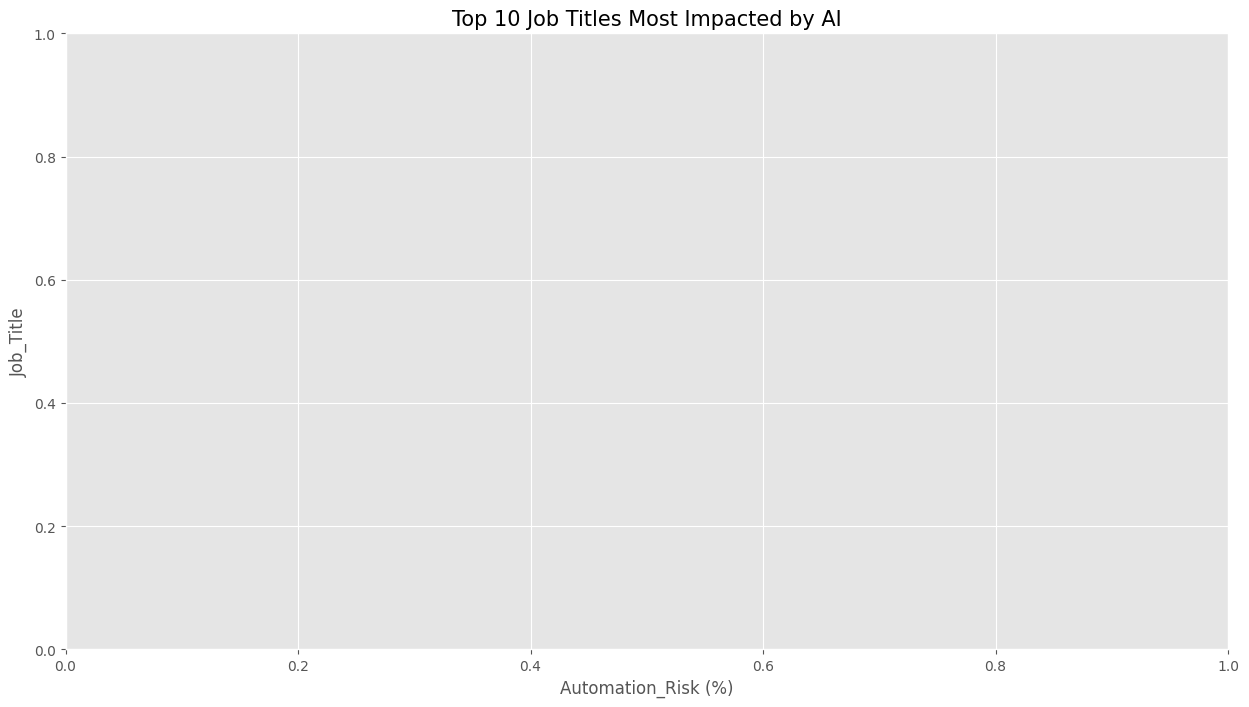

In [23]:
# Changing the data type in the AI Impact column to Integer while removing the % sign as well
if 'Automation_Risk' in df.columns:
    # Remove the % sign and convert to numeric, coercing errors to NaN
    df['Automation_Risk'] = pd.to_numeric(df['Automation_Risk'].str.rstrip('%'), errors='coerce') / 100
    
    # Drop rows with NaN values in the Automation_Risk column
    df = df.dropna(subset=['Automation_Risk'])
    
    top_10_impacted_jobs = df.sort_values(by='Automation_Risk', ascending=False).head(10)

    # Plotting the top 10 impacted jobs
    plt.figure(figsize=(15, 8))
    sns.barplot(x='Automation_Risk', y='Job_Title', data=top_10_impacted_jobs, palette='cividis')
    plt.title('Top 10 Job Titles Most Impacted by AI', fontsize=15)
    plt.xlabel('Automation_Risk (%)', fontsize=12)
    plt.ylabel('Job_Title', fontsize=12)
    plt.show()
else:
    print("Column 'Automation_Risk' does not exist in the dataframe.")